# Step 1: Data Collection - Load and inspect the dataset

In [1]:
import pandas as pd
import numpy as np
import re  # Import the 're' module for regular expressions
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
df = pd.read_csv(r"E:\Unified Mentor\Used Bike Prices- Feature Engineering and EDA\bikes.csv")
print("First 10 rows of the DataFrame:")
df.head(10)

First 10 rows of the DataFrame:


,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500
5,KTM Duke 200cc 2012,2012,24561 Km,third owner,bangalore,\n\n 35 kmpl,25 bhp,63400
6,Bajaj Pulsar 180cc 2016,2016,19718 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,55000
7,TVS Apache RTR 200 4V Dual Channel ABS BS6 2020,2020,Mileage 40 Kmpl,first owner,hyderabad,\n\n 40 Kmpl,20.21 bhp,120000
8,KTM Duke 390cc 2018,2018,1350 Km,first owner,jaipur,\n\n 25 kmpl,42.90 bhp,198000
9,Yamaha FZ16 150cc 2014,2014,Mileage 58 Kmpl,first owner,bangalore,\n\n 58 Kmpl,13 bhp,40000


# Step 2: Data Preprocessing

In [4]:
# Initial inspection
print("Dataset shape:", df.shape)
print("\nData types and missing values:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset shape: (7857, 8)

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB
None

Missing Values:
model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64


In [6]:
# Clean and convert 'mileage' column to numeric
df['mileage'] = (df['mileage'].astype(str).str.replace(r'[^\d.]+', '', regex=True).replace('', None))

# Convert to float (NaN for invalid entries)
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

# Clean and convert 'power' column to numeric
df['power'] = (df['power'].astype(str).str.replace(r'[^\d.]+', '', regex=True).replace('', None))

# Convert to float (NaN for invalid entries)
df['power'] = pd.to_numeric(df['power'], errors='coerce')

# Fill NaN values with medians
df['mileage'] = df['mileage'].fillna(df['mileage'].median())
df['power'] = df['power'].fillna(df['power'].median())

# Count blank values after cleaning
print("Dataset shape:", df.shape)
print("\nBlank values after cleaning:")
print(df.isnull().sum())

Dataset shape: (7857, 8)

Blank values after cleaning:
model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage        0
power          0
price          0
dtype: int64


# Step 3: Exploratory Data Analysis (EDA)

In [8]:
# Numerical summary
print("\nNumerical summary:")
df.describe()


Numerical summary:


,model_year,mileage,power,price
count,7857.000000,7857.000000,7.857000e+03,7.857000e+03
mean,2015.367698,91.513510,4.727011e+02,1.067913e+05
std,4.001443,461.613187,2.895175e+04,1.389261e+05
min,1950.000000,5.000000,7.000000e+00,0.000000e+00
25%,2014.000000,35.000000,1.400000e+01,4.200000e+04
50%,2016.000000,40.000000,1.900000e+01,7.500000e+04
75%,2018.000000,56.000000,2.416000e+01,1.250000e+05
max,2021.000000,5560.000000,2.510000e+06,3.000000e+06


In [10]:
# Categorical summary
print("\nCategorical columns summary:")
df.select_dtypes(include=['object']).describe()


Categorical columns summary:


,model_name,kms_driven,owner,location
count,7857,7857,7857,7838
unique,1724,1801,4,561
top,Royal Enfield Classic 350cc 2017,Mileage 65 Kmpl,first owner,delhi
freq,78,436,6817,1438


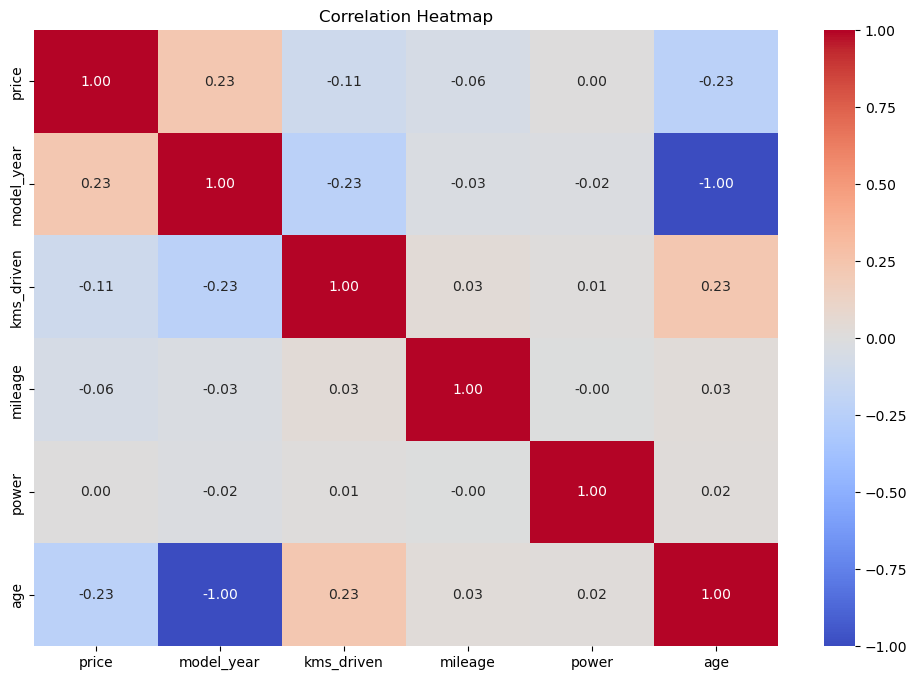

In [12]:
# Correlation heatmap

# --- Step 1: Clean the data ---
def extract_numeric(value):
    if isinstance(value, str):
        # Extract the first sequence of digits (e.g., "17000 Km" → 17000)
        digits = ''.join(filter(str.isdigit, value))
        return float(digits) if digits else None
    return value

# Clean columns with units (kms_driven, mileage, power)
df['kms_driven'] = df['kms_driven'].apply(extract_numeric)
df['mileage'] = df['mileage'].apply(extract_numeric)
df['power'] = df['power'].apply(extract_numeric)

# Ensure other columns are numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce')

# Calculate 'age' if not already done
current_year = pd.Timestamp.now().year
df['age'] = current_year - df['model_year']

# --- Step 2: Drop rows with missing values (optional) ---
bikes_clean = df[['price', 'model_year', 'kms_driven', 'mileage', 'power', 'age']].dropna()

# --- Step 3: Generate the heatmap ---
plt.figure(figsize=(12, 8))
corr = bikes_clean.corr()  # Now all columns are numeric
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")  # fmt=".2f" for 2 decimal places
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Visualization

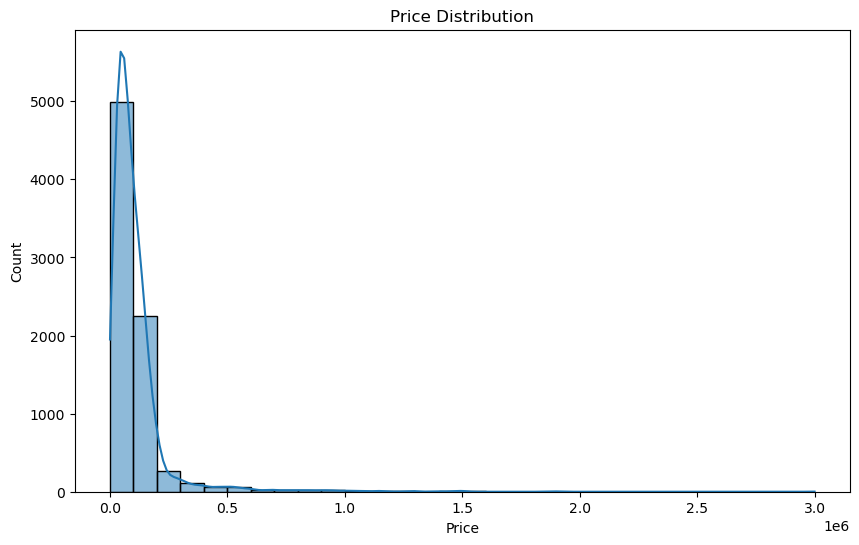

In [14]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

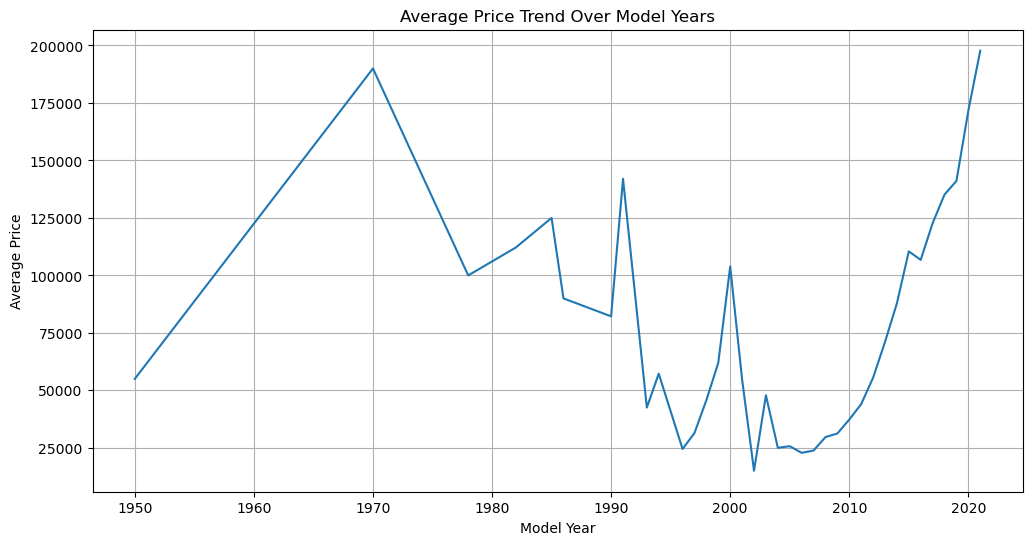

In [16]:
# Price trends over model years
plt.figure(figsize=(12, 6))
df.groupby('model_year')['price'].mean().plot()
plt.title('Average Price Trend Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

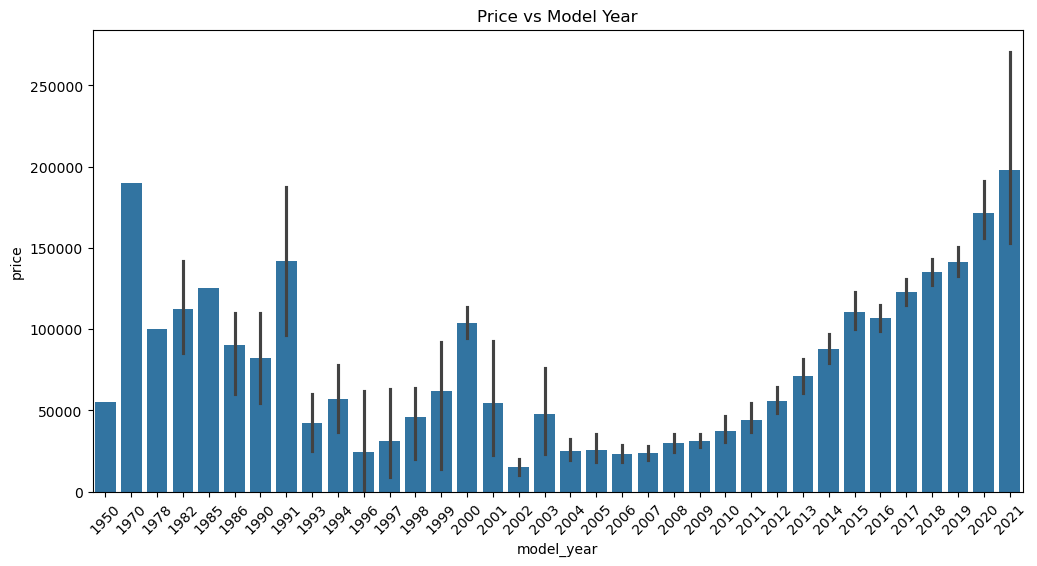

In [18]:
# Price vs Year
plt.figure(figsize=(12, 6))
sns.barplot(x='model_year', y='price', data=df)
plt.title('Price vs Model Year')
plt.xticks(rotation=45)
plt.show()

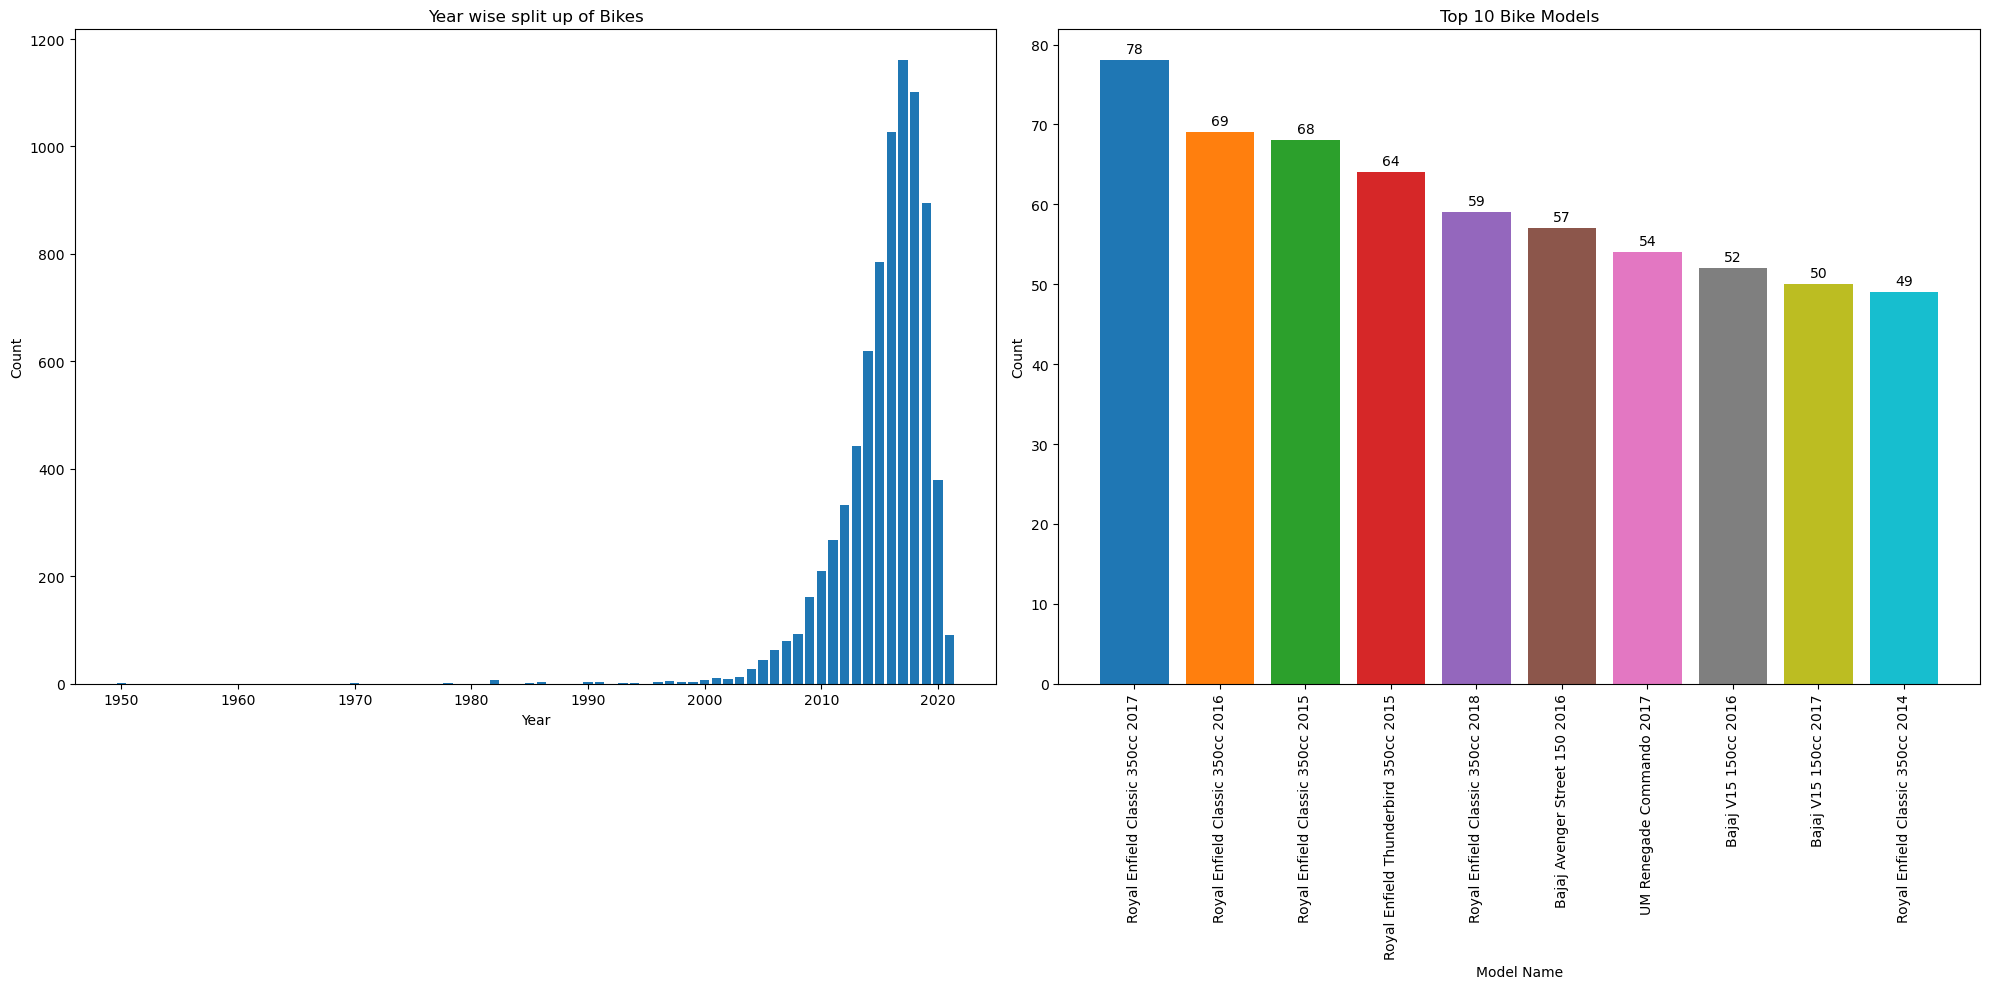

In [20]:
# Bike Distribution Analysis: Year-wise Count and Top 10 Models

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
x,count=np.unique(df.model_year,return_counts=True)
plt.bar(x,count)
plt.title("Year wise split up of Bikes")
plt.xlabel("Year")
plt.ylabel("Count")


plt.subplot(1,2,2)
model_counts = df['model_name'].value_counts().head(10)
x = model_counts.index
count = model_counts.values
colors = plt.cm.tab10.colors
bars = plt.bar(x, count, color=colors[:len(x)])

# Add data labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.,  
             height + 0.5,                       
             f'{int(height)}',                   
             ha='center',                        
             va='bottom',                        
             fontsize=10)
    
plt.title("Top 10 Bike Models")
plt.xlabel("Model Name")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.tight_layout() 
plt.show()

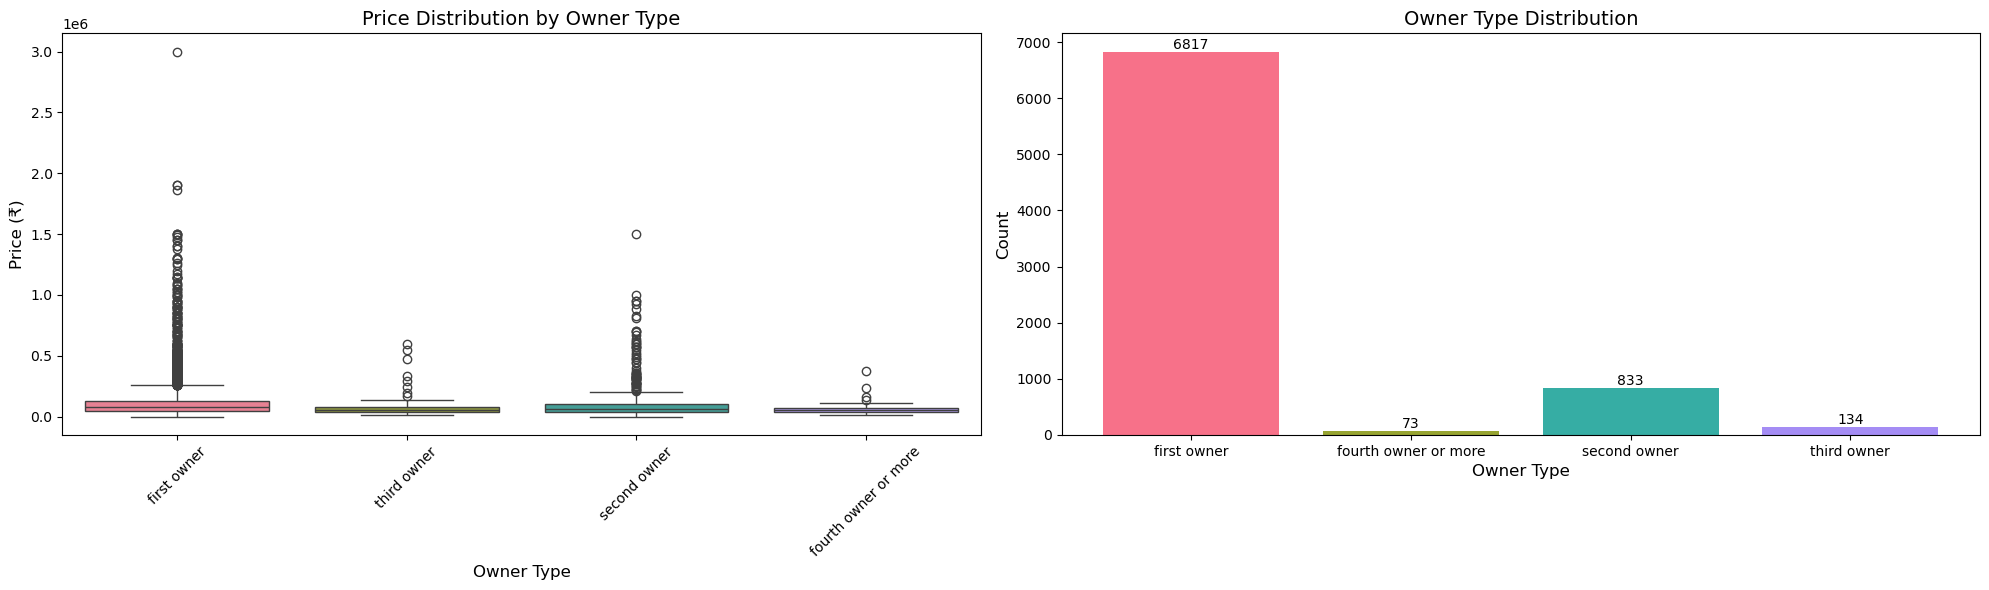

In [22]:
# Comparative Analysis of Bike Prices and Ownership Distribution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot 1: Boxplot (Owner vs Price)
# Define a color palette for the boxplot

boxplot_palette = sns.color_palette("husl", n_colors=len(df['owner'].unique()))
sns.boxplot(x='owner', y='price', data=df, ax=ax1, 
            hue='owner', palette=boxplot_palette, legend=False)
ax1.set_title('Price Distribution by Owner Type', fontsize=14)
ax1.set_xlabel('Owner Type', fontsize=12)
ax1.set_ylabel('Price (₹)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Bar Plot (Owner Counts)

x, count = np.unique(df['owner'], return_counts=True)

# Use the same colors as the boxplot for consistency
bar_colors = boxplot_palette[:len(x)]  
bars = ax2.bar(x, count, color=bar_colors)

# Add data labels to bars
for bar in bars:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

ax2.set_title("Owner Type Distribution", fontsize=14)
ax2.set_xlabel("Owner Type", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()

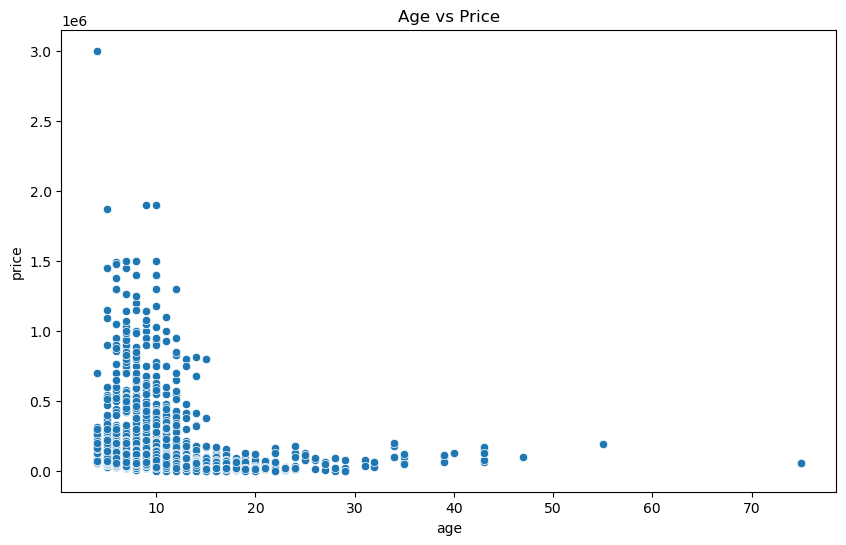

In [24]:
# Age vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='price', data=df)
plt.title('Age vs Price')
plt.show()

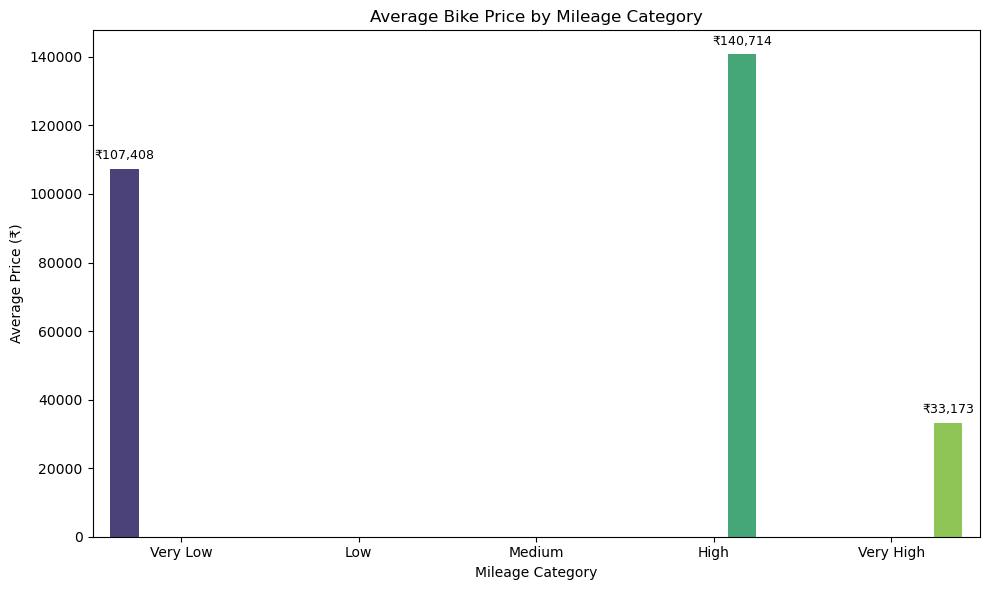

In [26]:
# Price vs Mileage
bikes_clean = df[['price', 'model_year', 'kms_driven', 'mileage', 'power', 'age']].dropna()

# Clean and convert mileage and price columns
bikes_clean['mileage_numeric'] = bikes_clean['mileage'].apply(extract_numeric)
bikes_clean['price'] = pd.to_numeric(bikes_clean['price'], errors='coerce')

# Drop rows with missing values
bikes_clean.dropna(subset=['mileage_numeric', 'price'], inplace=True)

# Bin mileage into 5 categories
bikes_clean['mileage_category'] = pd.cut(
    bikes_clean['mileage_numeric'],
    bins=5,
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

# Calculate average price for each mileage category
avg_price = bikes_clean.groupby('mileage_category', observed=True)['price'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=avg_price,
    x='mileage_category',
    y='price', hue='mileage_category',
    palette='viridis'
)

# Add price labels on bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'₹{height:,.0f}', 
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=9, xytext=(0, 5),
                textcoords='offset points')

# Labels and formatting
plt.title('Average Bike Price by Mileage Category')
plt.xlabel('Mileage Category')
plt.ylabel('Average Price (₹)')
plt.tight_layout()
plt.show()

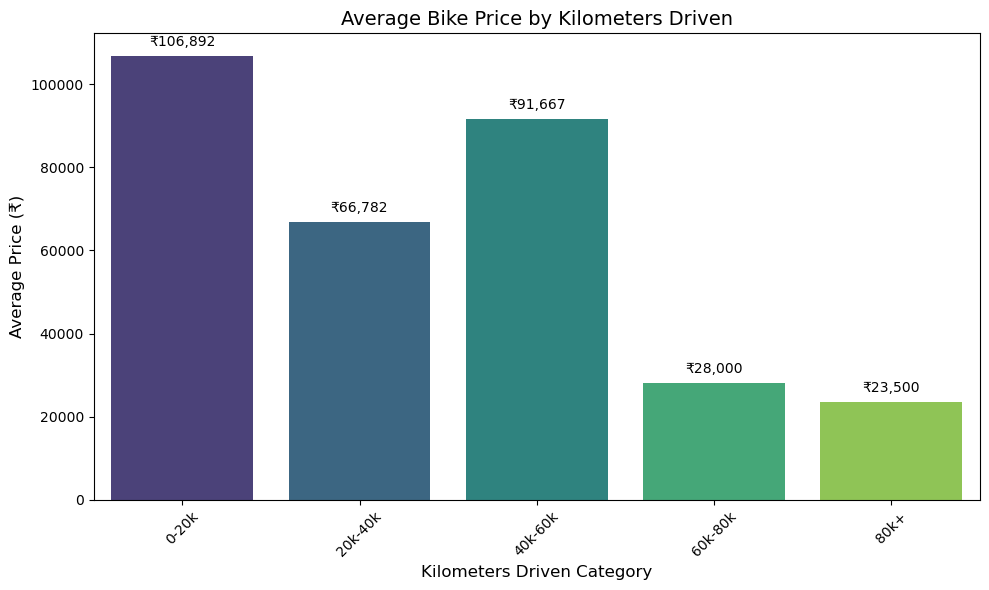

In [28]:
# Price vs Kilometers
# Clean 'kms_driven' column (using raw string for regex)
df['kms_driven'] = (
    df['kms_driven'].astype(str)
    .str.replace(r'[^\d.]', '', regex=True)  # Use raw string (r'') for regex
    .replace('', np.nan)
    .astype(float)
)

# Bin into categories
df['kms_category'] = pd.cut(
    df['kms_driven'],
    bins=5,
    labels=['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k+']
)

# Calculate average price per category
avg_price_by_kms = df.groupby('kms_category', observed=True)['price'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=avg_price_by_kms,
    x='kms_category',
    y='price',
    hue='kms_category',
    palette='viridis'
)

# Add value labels
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f'₹{height:,.0f}',
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center', va='bottom',
        fontsize=10,
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.title('Average Bike Price by Kilometers Driven', fontsize=14)
plt.xlabel('Kilometers Driven Category', fontsize=12)
plt.ylabel('Average Price (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

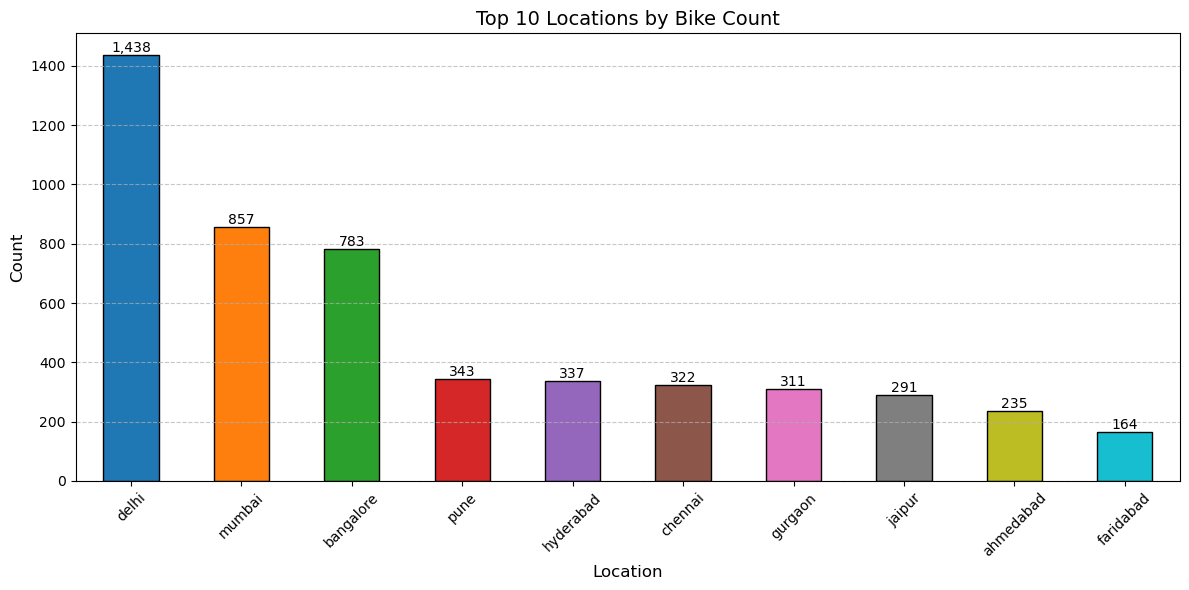

In [30]:
# Count of bikes by location (top 10)
plt.figure(figsize=(12, 6))

top_locations = df['location'].value_counts().head(10)

# Plot with custom colors (using a colormap)
ax = top_locations.plot(
    kind='bar',
    color=plt.cm.tab10(range(len(top_locations))),  # Different colors for each bar
    edgecolor='black'  # Optional: adds border to bars
)

# Add data labels on top of bars
for idx, value in enumerate(top_locations):
    ax.text(
        idx,                            # x-position
        value + 0.5,                    # y-position (slightly above bar)
        f'{value:,}',                   # Formatted count (with commas)
        ha='center',                    # Horizontal alignment
        va='bottom',                    # Vertical alignment
        fontsize=10
    )

# Customize plot
plt.title('Top 10 Locations by Bike Count', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: adds gridlines
plt.tight_layout()
plt.show()

In [ ]:
# Pairplot of numerical features
sns.pairplot(df[['price', 'model_year', 'kms_driven', 'mileage', 'power']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [ ]:
# Power vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='power', y='price', data=df)
plt.title('Price vs Power')
plt.xlabel('Power (bhp)')
plt.ylabel('Price')
plt.show()